### Snap LGC

In [1]:
results_dir = "../../../results/kay/rl/examples/snap/lgc"
results_dir = "../../../results/rl/examples/snap/lgc"

Text(0.5, 1.0, 'Snaps')

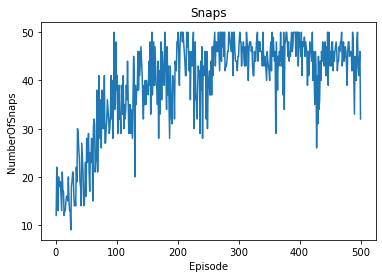

In [27]:
from snap_utils import read_snaps_data, plot_snaps

seed = 0
model = "QLearning"
# model = "Learned"

snaps_df = read_snaps_data(results_dir, model, seed)
plot_snaps(snaps_df)

Read ../../../results/rl/examples/snap/lgc/0/QLearning/LGCPolicy.csv


Episode                      StateAction  size
4007    200.0      GetOffer-Snapped Return-0.0     1
4019    200.0    ShouldTender-NotSnapped False     2
4005    200.0      GetGuide-Snapped Return-0.0    14
4004    200.0   GetGuide-NotSnapped Return-1.0    16
4013    200.0    ShouldAward-WillNotSnap False    21
4021    200.0       ShouldTender-Snapped False    21
4010    200.0  GetOffer-WillNotSnap Return-1.0    23
4009    200.0  GetOffer-WillNotSnap Return-0.0    27
4014    200.0     ShouldAward-WillNotSnap True    29
4022    200.0        ShouldTender-Snapped True    29
4003    200.0   GetGuide-NotSnapped Return-0.0    34
4006    200.0      GetGuide-Snapped Return-1.0    36
4020    200.0     ShouldTender-NotSnapped True    48
4008    200.0      GetOffer-Snapped Return-1.0    49

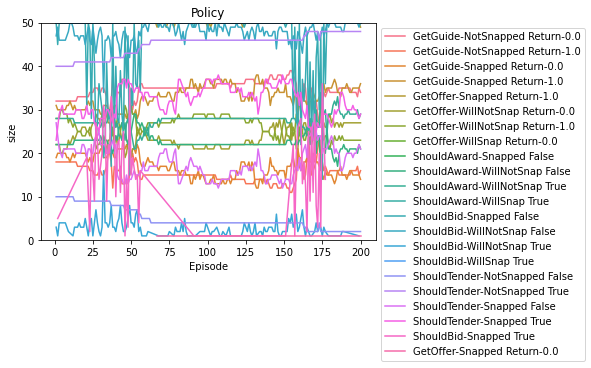

In [24]:
from snap_utils import read_policy_data, last_policy_values, plot_policy_actions_data

results_dir = "../../../results/rl/examples/snap/lgc"
seed = 0
model = "QLearning"

policy_df = read_policy_data(f"{results_dir}/{seed}", model)
policy_actions_df = plot_policy_actions_data(policy_df)
last_policy_df = last_policy_values(policy_actions_df)
last_policy_df[last_policy_df['size'] < 50].sort_values(by=['size'])
# last_policy_df[(last_policy_df['size'] == 50)]
    

In [ ]:
from snap_utils import read_avf_data, last_avf_values, plot_avf_data

results_dir = "../../../results/rl/examples/snap/lgc"
seed = 0
model = "QLearning"

avf_df = read_avf_data(f"{results_dir}/{seed}", model)
last_avf_values_df = last_avf_values(avf_df).sort_values(by=['mean'], ascending=False)
print(last_avf_values_df)

plot_avf_data(avf_df)
plot_avf_data(avf_df[avf_df['Agent'] == 6])

In [ ]:

import matplotlib.pyplot as plt
def plot_avf_data(df):
    plt.figure()
    sns_plot = sns.lineplot(data=df, x="Episode", y='Value', hue="StateAction")
#     , ci=None)
    sns_plot.set_title("AVF")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    
plot_avf_data(avf_df)
plot_avf_data(avf_df[avf_df['Agent'] == 6])

In [ ]:
from experiments import process_models, overview_data
from snap_utils import avf_file, policy_file
        
seeds = range(0,1)
models = ["QLearning"]

# model_seed_results_dir = f"{results_dir}/{seed}"
# avf_df = read_avf_data(model_seed_results_dir, model)
# policy_df = read_policy_data(model_seed_results_dir, model)

process_models(results_dir, seeds, avf_file, models)
process_models(results_dir, seeds, policy_file, models)

In [ ]:

avf_df = read_avf_data(model_seed_results_dir, model)
print(policy_df[
    (policy_df['StateAction'] == "ShouldTender-Snapped True") &
    (policy_df['Episode'] == 100)
]['Agent'])
# print(policy_df[
#     (policy_df['StateAction'] == "ShouldTender-Snapped False") &
#     (policy_df['Episode'] == 50)
# ]['Agent'])

# test_df = policy_df[
#     (policy_df['Agent'] == 6) &
#     (policy_df['Episode'] == 50)
# ]
# print(test_df)

# test_df = avf_df[
#     (avf_df['Agent'] == 6) &
#     (avf_df['Episode'] == 50)
# ]
# test_df

# sns.lineplot(data=test_df, x='Episode', y="Value", hue='StateAction')

In [ ]:
from Experiments import last

from os.path import exists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

models = ["QLearning", "QLambdaLearning", "QDLearning", "QDLambdaLearning"]
models = ["QLearning", "QDLearning"]
# models = ["QLearning"]
seeds = range(0, 40)
# seeds = range(0, 1)
snaps_file = "Snaps"

def read_snaps_data(results_dir, model, seed, file):
    dataset_path = f'{results_dir}/{seed}/{model}/{file}.csv'
    df = pd.read_csv(dataset_path)
    df['Model'] = model
    df['Seed'] = seed
    df["Episode"] = (df["Time"] / ticks_per_episode).apply(np.int64)
    return(df)

def read_snaps_data_for_seeds(results_dir, models, seeds, file):
    df = pd.DataFrame()
    for seed in seeds:
        for model in models:
            model_df = read_snaps_data(results_dir, model, seed, file)
            df = df.append(model_df)
    df.reset_index(inplace=True)
    return(df)

def plot_snaps_data(df):
    plt.figure()
    sns_plot = sns.lineplot(data=df, x="Episode", y='NumberOfSnaps', hue='Model').set_title("Snaps")
#     sns_plot = sns.lineplot(data=df, x="Episode", y='NumberOfSnaps',hue='Seed').set_title("Snaps")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    return(sns_plot)

def last_values(df):
    last_df = pd.DataFrame()
    for model in models:
        model_df = df[df["Model"] == model]
        if (len(model_df) > 0):
            max_time = max(model_df["Episode"])
            last_model_df = model_df[(model_df["Episode"] == max_time)]
            last_df = last_df.append(last_model_df)
    return(last_df)

snaps_df = read_snaps_data(results_dir, models[0], 2, snaps_file)
# plot_snaps_data(snaps_df)

df = read_snaps_data_for_seeds(results_dir, models, seeds, snaps_file)
last_values(df)
last_episode = max(df['Episode'])
last_episode = 15
last_df = df[df['Episode'] == last_episode]

# last_df[last_df['Model'] == 'QLearning'].reset_index()
# df[df['Model'] == 'QLambdaLearning']
last_by_model_df = pd.pivot_table(last_df, index=['Model'], values=['NumberOfSnaps'], aggfunc=(np.mean, np.std))
last_by_model_df
print(last_by_model_df)

by_model_df = pd.pivot_table(df, index=['Model','Episode'], values=['NumberOfSnaps'], aggfunc=np.mean)
by_model_df = pd.DataFrame(by_model_df.to_records())
by_model_df

plot_snaps_data(df) 
# last_df['NumberOfSnaps'].plot.box()
    